In [2]:
import pandas as pd
# Time Series libraries:
from matplotlib import pyplot as plt # required for decomposition
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
import pymannkendall as mk
from statsmodels.stats.diagnostic import het_white
# SSL to overcome problem with ssl whn applying pd.read_csv()
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

plt.style.use('seaborn-v0_8')
import matplotlib.dates as mdates
# Stationarity Function and Methods
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib
from matplotlib import rcParams

# Evaluation and Error functions
# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , mean_absolute_percentage_error
from math import sqrt
#figures
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-v0_8')
#warnings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

# Date function and holidays
from datetime import date
from datetime import datetime
import holidays
#skimpy fro descriptive analysis and using transformars
import skimpy as sk
import seaborn as sns
import tensorflow as ts


In [3]:
import csv
import datetime as dt


# Data Manipulation
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Similarity calculation
from sklearn.metrics.pairwise import cosine_similarity

# Import ML libraries
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
# settings
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

# Math
import math

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
# for user-user similarity recommender system
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import implicit # implicit recommender library
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics.pairwise import cosine_similarity
from implicit.als import AlternatingLeastSquares
# To visualize iterations
from tqdm import tqdm

In [5]:
# import all the required csv files
data_dictionary= pd.read_csv("data_dictionary.csv",index_col=None)
merged_all_three = pd.read_csv('merged_all_three_product_cluster.csv', index_col=None)
interactions = pd.read_csv('interactions.csv', index_col=None)
popularity = pd.read_csv('popularity.csv', index_col=None)
monthly_aggregated = pd.read_csv('monthly_aggregated.csv', index_col=None)
cluster_check = pd.read_csv('cluster_check.csv', index_col=None)
cluster_counts = pd.read_csv('cluster_counts.csv', index_col=None)


In [6]:
data_dictionary

,Name,Table,Description
0,active_customer,commercial_activity,Client activity indicator in our application\r
1,entry_channel,commercial_activity,Customer acquisition channel\r
2,entry_date,commercial_activity,Date on which first easyMoney contract was sig...
3,segment,commercial_activity,Customer business segment
4,age,sociodemographic,Customer age
5,country_id,sociodemographic,Country of residence of the client
6,deceased,sociodemographic,Deceased index. N/S
7,gender,sociodemographic,Gender
8,region_code,sociodemographic,Customer's province of residence (for ES)
9,salary,sociodemographic,Household gross income


In [7]:
interactions.set_index('pk_cid', inplace=True)
interactions.head(1)

,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p
pk_cid,,,,,,,,,,,,,,,
15891.0,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
merged_all_three.drop(columns=['Unnamed: 0'], inplace=True)
merged_all_three.head(1)

,pk_partition,pk_cid,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,payroll_pension_unknown,payroll_account,emc_account,debit_card,em_account_p,em_account,entry_date,deceased,short_term_deposit,pension,savings_products,loan_products,investment_products,payment_products,cluster,months_elapsed,weight
0,2018-01-28,1000028,False,False,False,False,False,False,False,False,False,False,True,False,True,2017-01-03,0,False,False,False,False,False,True,0,16,0.02


In [9]:
cluster_counts.head(5)

,pk_partition,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,2018-01-28,57383,5985,47256,26722,23092,244,62599,16212
1,2018-02-28,59694,6100,47202,26704,23734,247,62592,16201
2,2018-03-28,61794,6225,47127,26693,24417,251,62513,16191
3,2018-04-28,63519,6316,47035,26678,25004,251,62422,16192
4,2018-05-28,65409,6404,46984,26668,25608,252,62342,16213


In [10]:
monthly_aggregated.drop(columns=['Unnamed: 0'], inplace=True)
monthly_aggregated.head(1)

,pk_partition,deceased,Total_Subscribers,Active_Customers,New Monthly Subscribers,Unsubscribed,Loyal Customer,New Customer,Regular Customer,Entry_Channel_KAT,Entry_Channel_KFC,Entry_Channel_KHE,Entry_Channel_KHK,Entry_Channel_KHQ,Entry_Channel_Others,Entry_Channel_Unknown,02 - PARTICULARES,03 - UNIVERSITARIO,Unknown Segment,01 - TOP,region_11,region_15,region_28,region_30,region_41,region_46,region_8,region_Others,female,age_group_Senior,age_group_Middle-Aged,age_group_Adult,age_group_Young Adult,medium_salary,Unknown_salary,high_salary,low_salary,Total_Short_Term_Deposit,loans,mortgages,funds,securities,credit_card,debit_card,long_term_deposit,payroll,pension,payroll_pension_unknown,payroll_account,em_account,em_account_p,emc_account,months_elapsed,weight,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
0,2018-01-28,47,239446,108211,2590,0,84767,0,154726,20926,40170,160717,5236,0,12426,18,65722,169792,28,3951,7224,11532,39396,13182,12957,13970,22128,31157,125478,5109,22411,106996,104977,192218,43494,2335,1446,883,19,15,786,932,3325,24696,4884,8145,8835,17,13478,215293,2,15320,16,0.02,57383,5985,47256,26722,23092,244,62599,16212


In [11]:
cluster_check.drop(columns=['Unnamed: 0'], inplace=True)
cluster_check.head(3)

,pk_cid,pk_partition,cluster
0,1000028,2018-01-28,0
1,1000028,2018-02-28,0
2,1000028,2018-03-28,0


In [12]:
cluster_counts.set_index('pk_partition', inplace=True)
cluster_counts.head(1)

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7
pk_partition,,,,,,,,
2018-01-28,57383,5985,47256,26722,23092,244,62599,16212


In [13]:
popularity.drop(columns=['Unnamed: 0'], inplace=True)
popularity.head(1)

,Product,Popularity,Normalized_Popularity,Weighted_ROI,Normalized_Weighted_ROI,Rank
0,em_account,283907.006536,1.0,2.839070e+06,1.0,1.0


In [14]:
# now let's set the cluster for all of the users their last attributed clsuter
cid_cluster_map = merged_all_three[['pk_partition','pk_cid', 'cluster']].copy()
cid_cluster_map.drop_duplicates(subset=['pk_cid', 'cluster'], inplace=True)
cid_cluster_map.drop_duplicates(subset=['pk_cid'], keep='last', inplace=True)

In [15]:
cid_cluster_map

,pk_partition,pk_cid,cluster
0,2018-01-28,1000028,0
17,2018-01-28,1000096,3
34,2018-07-28,1000105,4
43,2018-01-28,1000113,2
57,2018-07-28,1000130,0
...,...,...,...
5961904,2018-01-28,998859,7
5961922,2019-01-28,999706,5
5961927,2018-01-28,999825,0
5961944,2018-01-28,999835,7


In [16]:
cid_cluster_map.drop(columns=['pk_partition'], axis=1, inplace=True)

In [17]:
cid_cluster_map.reset_index(drop=True)

,pk_cid,cluster
0,1000028,0
1,1000096,3
2,1000105,4
3,1000113,2
4,1000130,0
...,...,...
456368,998859,7
456369,999706,5
456370,999825,0
456371,999835,7


In [18]:
interactions.shape

(456373, 15)

In [19]:
# adding correct clusters to 
cluster_base_interactions = interactions.merge(cid_cluster_map, on='pk_cid', how='left')
display(cluster_base_interactions.head())
cluster_base_interactions.shape

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster
0,15891.0,0.14,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,16063.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,16203.0,4.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,16502.0,5.20,0.0,0.0,0.0,0.0,0.00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,17457.0,6.12,3.0,0.0,0.0,0.0,5.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


(456373, 17)

In [20]:
test_id = 1000306
test_data = cluster_base_interactions[cluster_base_interactions['pk_cid'] == test_id]
display(test_data)
test_id=1000381
test_data = cluster_base_interactions[cluster_base_interactions['pk_cid'] == test_id]
display(test_data)


,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster
5123,1000306.0,0.0,6.12,0.92,0.92,0.0,0.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster
5125,1000381.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Now that we set the last clusters based on the last pk_partition update we have the correct clusters of our customers and we can analyze how customers are currently distributed over clusters.

In [21]:
# Group by 'cluster' and sum the columns
cluster_product_interaction = cluster_base_interactions.groupby('cluster').sum()
cluster_product_interaction.drop(columns=['pk_cid'],axis=1, inplace=True)
cluster_product_interaction.head(10)

,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p
cluster,,,,,,,,,,,,,,,
0,405402.220212,115606.460101,46256.000064,44489.140059,10287.540015,14768.280015,70268.780035,47099.860019,3559.500001,2528.740002,1266.320005,77.62,36.04,1.86,0.00
1,130985.760056,28381.980010,10709.140004,9725.600005,3592.060003,8266.680004,15231.660004,19414.280003,1789.900000,1516.540000,867.360003,4.12,24.42,0.26,0.00
2,382979.480076,17392.780022,6866.920011,6694.480011,2037.920002,748.760000,11948.880007,9567.140006,457.740000,216.160000,61.300000,23.72,7.04,0.24,0.00
3,69277.740009,2632.680002,753.220001,680.120001,157.380001,83.700000,1580.740002,935.960000,33.880000,27.740000,3.700000,0.00,0.00,0.00,0.00
4,135423.520044,25138.980018,8066.060007,6997.220008,2949.380004,6526.340004,13225.600010,14709.540008,1317.900002,1337.460001,223.660002,25.70,24.18,0.70,0.00
5,218686.720053,2519.220001,572.980000,525.480000,2.600000,13.100000,1256.660002,66.660000,15.000000,1.000000,3.780000,0.00,0.00,0.10,0.00
6,329178.020044,6402.720006,1478.020002,1386.180002,83.500000,60.340000,3575.500003,291.900001,6.340000,12.060000,1.540000,1.90,0.00,0.00,0.00
7,65577.420040,36122.360030,16047.240022,15168.720021,8562.540014,8287.240008,22358.160007,39337.680010,2471.800000,2239.960001,19.320000,47.08,34.18,0.14,12.24


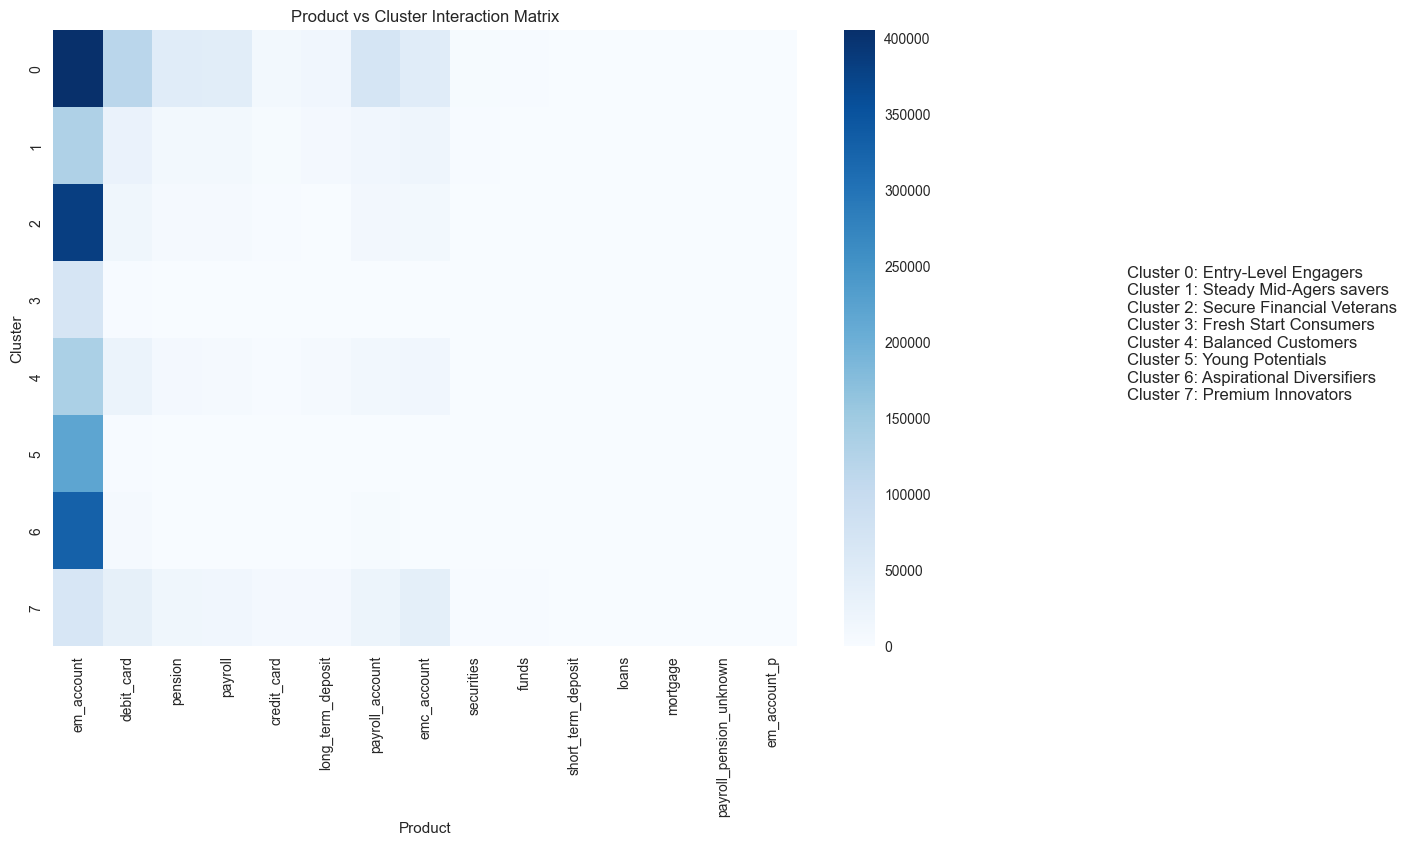

In [22]:

# Assuming 'cluster_product_matrix' is your interaction matrix
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_product_interaction, cmap='Blues')
# Custom legend outside the plot
cluster_descriptions = {
    0: 'Entry-Level Engagers',
    1: 'Steady Mid-Agers savers',
    2: 'Secure Financial Veterans',
    3: 'Fresh Start Consumers',
    4: 'Balanced Customers',
    5: 'Young Potentials',
    6: 'Aspirational Diversifiers',
    7: 'Premium Innovators'
}
legend_text = '\n'.join([f"Cluster {cluster}: {description}" for cluster, description in cluster_descriptions.items()])
plt.figtext(1.02, 0.5, legend_text, ha='left', va='center', fontsize=12)
plt.xlabel('Product')
plt.ylabel('Cluster')
plt.title('Product vs Cluster Interaction Matrix')
plt.show()


The analysis reveals that "em_account" is the most widely used product across all clusters, indicating its importance as a prerequisite for other products. This highlights the necessity of recommending this account as a first step for subscribers who do not have it yet. Conversely, "securities," "funds," "short-term-deposit," "loans," "mortgages," and "em_account_p" are among the least popular products across all clusters. Their low popularity could be attributed to factors such as lack of customer awareness, strong competition from other products, and ineffective marketing strategies. To maximize revenue, EasyMoney should investigate the root causes of their low popularity and consider targeted promotional campaigns or product improvements.

In Cluster 0, "debit card," "payroll_account," and "emc_account" emerge as the most popular products, mirroring trends seen in other clusters. The "Premium Innovators" cluster stands out for its diverse product portfolio, with "debit_card" being particularly popular. However, there is a notable lack of diversity in product usage among "Fresh Start Consumers" (Cluster 3), "Aspirational Diversifiers" (Cluster 6), and "Young Potentials" (Cluster 5), where "em_account" is the sole product in use. Understanding the needs and behaviors of these clusters is crucial for tailoring products and devising effective marketing strategies.

Overall, EasyMoney should focus on promoting less popular products, considering the significant revenue potential they offer. Additionally, understanding customer needs and preferences in each cluster can guide the development of targeted marketing campaigns and product enhancements, ultimately leading to increased customer engagement and revenue growth.

Due to resource constraints and memory limitations caused by the sheer volume of data, a careful examination reveals that clusters 3, 6, and 5 lack significant diversity in their datasets for effective recommendation targeting. These clusters should instead be earmarked for a separate campaign aimed at re-engaging inactive customers. With EasyMoney facing pressure from investors and partners to achieve high revenue and response rates swiftly, a strategic approach is imperative.

In light of this, our strategy is to target clusters with a higher likelihood of purchasing recommended products. Given the constraint of 10,000 emails, it is essential to optimize their use by targeting subscribers most inclined to engage in cross-subscriptions. To this end, I propose the removal of the aforementioned clusters from our targeting strategy, as they have not been effectively targeted previously, and lack sufficient historical data on product interactions for accurate prediction.

Furthermore, subscribers categorized as deceased will also be removed from consideration, as their inclusion may introduce noise and potentially mislead interpretations. Despite representing a small percentage of customers, their removal will refine our targeting strategy and enhance the accuracy of our recommendations.

In [23]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456373 entries, 15891.0 to 1553689.0
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   em_account               456373 non-null  float64
 1   debit_card               456373 non-null  float64
 2   pension                  456373 non-null  float64
 3   payroll                  456373 non-null  float64
 4   credit_card              456373 non-null  float64
 5   long_term_deposit        456373 non-null  float64
 6   payroll_account          456373 non-null  float64
 7   emc_account              456373 non-null  float64
 8   securities               456373 non-null  float64
 9   funds                    456373 non-null  float64
 10  short_term_deposit       456373 non-null  float64
 11  loans                    456373 non-null  float64
 12  mortgage                 456373 non-null  float64
 13  payroll_pension_unknown  456373 non-null  float64
 14  

In [24]:
# Remove clusters 3,6,5
# Get the pk_cid values associated with clusters 3, 5, and 6
clusters_to_remove = [3, 5, 6]
pk_cid_to_remove = cid_cluster_map[cid_cluster_map['cluster'].isin(clusters_to_remove)]['pk_cid']
pk_cid_to_remove.tail(10)

5959079    938371
5959984    959257
5960133    964854
5960317    970787
5960351    970972
5960643    976325
5960999    984299
5961201    987569
5961495     99283
5961922    999706
Name: pk_cid, dtype: int64

In [25]:
cluster_base_interactions = cluster_base_interactions[~cluster_base_interactions['cluster'].isin([3, 5, 6])]


In [26]:
cluster_base_interactions.shape

(302185, 17)

In [27]:
cluster_check = cluster_base_interactions['cluster'].isin([3, 5, 6]).any()
print(cluster_check)


False


we reduced the size from 456,373 to 302,185.Out of 15 products we dont have value for 7 of them, rarely a susbcriber has history on these products, out of the remaining 8 a subscriber should at least have 2 activated products to be considered as potential target and willing to interact more and have a high response rate to the campaign.

In [28]:
interactions.columns

Index(['em_account', 'debit_card', 'pension', 'payroll', 'credit_card',
       'long_term_deposit', 'payroll_account', 'emc_account', 'securities',
       'funds', 'short_term_deposit', 'loans', 'mortgage',
       'payroll_pension_unknown', 'em_account_p'],
      dtype='object')

In [29]:
cluster_base_interactions.columns

Index(['pk_cid', 'em_account', 'debit_card', 'pension', 'payroll',
       'credit_card', 'long_term_deposit', 'payroll_account', 'emc_account',
       'securities', 'funds', 'short_term_deposit', 'loans', 'mortgage',
       'payroll_pension_unknown', 'em_account_p', 'cluster'],
      dtype='object')

In [30]:
merged_all_three.columns

Index(['pk_partition', 'pk_cid', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll',
       'payroll_pension_unknown', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_account', 'entry_date', 'deceased',
       'short_term_deposit', 'pension', 'savings_products', 'loan_products',
       'investment_products', 'payment_products', 'cluster', 'months_elapsed',
       'weight'],
      dtype='object')

In [31]:
# Count the number of filled product cells for each row
product_columns=interactions.columns
cluster_base_interactions['num_filled_cells'] = cluster_base_interactions[product_columns].apply(lambda row: row.astype(bool).sum(), axis=1)

In [32]:
distribution = cluster_base_interactions['num_filled_cells'].value_counts()
print(distribution)


num_filled_cells
1     152029
0      63476
2      46010
3      12511
4      11950
5      11577
6       3547
7        869
8        172
9         41
10         3
Name: count, dtype: int64


For reducing the size, I am going to remove customers with less than 3 products and remove deceased users

In [33]:
# Find rows with less than 3 filled cells and exclude deceased users
rows_to_remove = cluster_base_interactions[(cluster_base_interactions['num_filled_cells'] < 3) | (merged_all_three['deceased'] == 1)].index

# Drop rows with less than 3 filled cells or deceased users
cluster_base_interactions.drop(index=rows_to_remove, inplace=True)



In [34]:
distribution = cluster_base_interactions['num_filled_cells'].value_counts()
print(distribution)

num_filled_cells
3     12509
4     11949
5     11577
6      3547
7       869
8       172
9        41
10        3
Name: count, dtype: int64


In [35]:
reduced_size=cluster_base_interactions['num_filled_cells'].sum()

In [36]:
reduced_size

172348

In [37]:
# Remove the 'num_filled_cells' column
cluster_base_interactions.drop(columns='num_filled_cells', inplace=True)

In [38]:
cluster_base_interactions.shape

(40667, 17)

Now, let's proceed with ranking the customer base. We will designate the first 10,000 customers as the test dataset, representing the real target customers. The remaining customers will form the train dataset. It's important to consider that our revenue is approximately €10 for each account sold, €40 for savings and investment products (plans, funds, etc.), and €60 for financing products (loans and cards).

To rank the customers, we will take into account their potential Return on Investment (ROI), current interactions and activities, as well as their engagement matrix. This comprehensive approach ensures that our ranking reflects both the revenue potential and the level of engagement of each subscriber.

In [39]:

# Calculate the sum of interactions for each user across specified columns
interaction_sum = cluster_base_interactions[['em_account', 'debit_card', 'pension', 'payroll',
                               'credit_card', 'long_term_deposit', 'payroll_account',
                               'emc_account', 'securities', 'funds', 'short_term_deposit',
                               'loans', 'mortgage', 'payroll_pension_unknown',
                               'em_account_p']].sum(axis=1)

# Sort the users based on their interaction sum and assign ranks
cluster_base_interactions['engagement_Rank'] = interaction_sum.rank(ascending=False, method='min')

# Display the interaction DataFrame with the added "Rank" column

cluster_base_interactions= cluster_base_interactions.sort_values(by='engagement_Rank')
cluster_base_interactions.head(100)

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank
105410,1128353.0,0.00,5.70,6.12,6.12,6.12,6.00,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,7,1.0
154003,1190607.0,6.00,6.12,6.12,6.12,6.12,3.40,6.12,6.12,0.00,6.10,0.0,0.00,0.00,0.0,0.0,0,2.0
58850,1070525.0,0.00,6.12,6.12,6.12,2.16,6.12,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,1,3.0
102730,1124128.0,0.00,6.12,5.52,5.52,3.06,6.12,6.12,6.12,4.90,6.12,0.0,0.00,0.00,0.0,0.0,1,4.0
106732,1133500.0,0.00,6.12,6.12,6.12,6.12,0.00,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,2,5.0
60073,1071910.0,6.12,6.12,6.12,6.12,6.12,0.00,6.12,6.12,0.00,6.12,0.0,0.00,0.00,0.0,0.0,7,5.0
44499,1053446.0,0.00,6.12,6.12,6.12,6.12,6.12,6.12,6.12,0.00,6.12,0.0,0.00,0.00,0.0,0.0,7,5.0
197655,1241782.0,6.12,6.12,6.12,6.12,6.10,6.12,6.12,6.12,0.00,0.00,0.0,0.00,0.00,0.0,0.0,4,8.0
103793,1125823.0,6.12,6.12,5.80,5.80,6.12,0.30,6.12,6.12,0.00,6.10,0.0,0.00,0.00,0.0,0.0,1,9.0
196618,1240220.0,0.00,6.12,6.12,6.12,5.72,0.00,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,0,10.0


In [40]:
popularity.head(20)

,Product,Popularity,Normalized_Popularity,Weighted_ROI,Normalized_Weighted_ROI,Rank
0,em_account,283907.006536,1.000000,2.839070e+06,1.000000,1.0
1,debit_card,38267.513072,0.134787,2.296051e+06,0.808733,2.0
2,pension,14828.362745,0.052228,5.931345e+05,0.208919,3.0
3,payroll,13997.866013,0.049303,5.599146e+05,0.197218,4.0
4,credit_card,4521.718954,0.015925,2.713031e+05,0.095561,5.0
5,long_term_deposit,6332.424837,0.022303,2.532970e+05,0.089218,6.0
6,payroll_account,22785.290850,0.080254,2.278529e+05,0.080256,7.0
7,emc_account,21474.349673,0.075637,2.147435e+05,0.075639,8.0
8,securities,1577.133987,0.005553,6.308536e+04,0.022220,9.0
9,funds,1287.526144,0.004533,5.150105e+04,0.018140,10.0


Now, let's calculate the potential ROI of customers

In [41]:
# Calculate potential ROI of a customer
max_rank = 100
min_rank = 20
popularity['Popularity_rate'] = (popularity['Rank'] - popularity['Rank'].max()) / (popularity['Rank'].min() - popularity['Rank'].max()) * (max_rank - min_rank) + min_rank

In [42]:
# Replace product names in the 'Product' column
popularity['Product'] = popularity['Product'].replace({
    'Total_Short_Term_Deposit': 'short_term_deposit',
    'mortgages': 'mortgage'
})

In [43]:
# Calculate potential_ROI
# Apply ROI values to consider both company and user benefit
roi = {
  'loans': 60,
  'credit_card': 60,
  'debit_card': 60,
  
  'mortgage': 40,
  'funds': 40,
  'securities': 40,
  'payroll': 40,
  'pension': 40,
  'payroll_pension_unknown': 0,
  
  'short_term_deposit': 40,
  'long_term_deposit': 40,  

  'payroll_account': 10,
  'em_account': 10,
  'em_account_p': 10,
  'emc_account': 10
}
cluster_base_interactions['potential_roi'] = 0
# Iterate over each product and calculate potential ROI
for col in roi.keys():
 # Get the popularity rate for the current product
    pop_rate = popularity.loc[popularity['Product'] == col, 'Popularity_rate'].values[0] / 100
        
    # Calculate potential ROI and update the 'potential_roi' column
    cluster_base_interactions['potential_roi'] += (cluster_base_interactions[col] == 0).astype(int) * roi[col] * pop_rate


In [44]:
cluster_base_interactions.head(100)

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi
105410,1128353.0,0.00,5.70,6.12,6.12,6.12,6.00,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,7,1.0,64.571429
154003,1190607.0,6.00,6.12,6.12,6.12,6.12,3.40,6.12,6.12,0.00,6.10,0.0,0.00,0.00,0.0,0.0,0,2.0,76.285714
58850,1070525.0,0.00,6.12,6.12,6.12,2.16,6.12,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,1,3.0,64.571429
102730,1124128.0,0.00,6.12,5.52,5.52,3.06,6.12,6.12,6.12,4.90,6.12,0.0,0.00,0.00,0.0,0.0,1,4.0,64.571429
106732,1133500.0,0.00,6.12,6.12,6.12,6.12,0.00,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,2,5.0,93.142857
60073,1071910.0,6.12,6.12,6.12,6.12,6.12,0.00,6.12,6.12,0.00,6.12,0.0,0.00,0.00,0.0,0.0,7,5.0,104.857143
44499,1053446.0,0.00,6.12,6.12,6.12,6.12,6.12,6.12,6.12,0.00,6.12,0.0,0.00,0.00,0.0,0.0,7,5.0,86.285714
197655,1241782.0,6.12,6.12,6.12,6.12,6.10,6.12,6.12,6.12,0.00,0.00,0.0,0.00,0.00,0.0,0.0,4,8.0,95.714286
103793,1125823.0,6.12,6.12,5.80,5.80,6.12,0.30,6.12,6.12,0.00,6.10,0.0,0.00,0.00,0.0,0.0,1,9.0,76.285714
196618,1240220.0,0.00,6.12,6.12,6.12,5.72,0.00,6.12,6.12,6.12,6.12,0.0,0.00,0.00,0.0,0.0,0,10.0,93.142857


In [45]:
# Let's test if the Potential ROI is calculated correctly
display(cluster_base_interactions[cluster_base_interactions.index==1128353.0]) #most engaged customer
display(cid_cluster_map[cid_cluster_map['pk_cid'] == 1128353.0])
display(roi)
display(popularity)

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi


,pk_cid,cluster
1585467,1128353,7


{'loans': 60,
 'credit_card': 60,
 'debit_card': 60,
 'mortgage': 40,
 'funds': 40,
 'securities': 40,
 'payroll': 40,
 'pension': 40,
 'payroll_pension_unknown': 0,
 'short_term_deposit': 40,
 'long_term_deposit': 40,
 'payroll_account': 10,
 'em_account': 10,
 'em_account_p': 10,
 'emc_account': 10}

,Product,Popularity,Normalized_Popularity,Weighted_ROI,Normalized_Weighted_ROI,Rank,Popularity_rate
0,em_account,283907.006536,1.000000,2.839070e+06,1.000000,1.0,100.000000
1,debit_card,38267.513072,0.134787,2.296051e+06,0.808733,2.0,94.285714
2,pension,14828.362745,0.052228,5.931345e+05,0.208919,3.0,88.571429
3,payroll,13997.866013,0.049303,5.599146e+05,0.197218,4.0,82.857143
4,credit_card,4521.718954,0.015925,2.713031e+05,0.095561,5.0,77.142857
5,long_term_deposit,6332.424837,0.022303,2.532970e+05,0.089218,6.0,71.428571
6,payroll_account,22785.290850,0.080254,2.278529e+05,0.080256,7.0,65.714286
7,emc_account,21474.349673,0.075637,2.147435e+05,0.075639,8.0,60.000000
8,securities,1577.133987,0.005553,6.308536e+04,0.022220,9.0,54.285714
9,funds,1287.526144,0.004533,5.150105e+04,0.018140,10.0,48.571429


Now I want to calculate manually to ensure that the value is correct let's get the first crow value :

product columns with 0 :

    em_account,10
    short_term_deposit,40
    loans,60
    mortgage,40  
    em_account_p 10
    64.571429 result
    10*1 + 40*0.42857143 + 60 *0.37142857 + 40*0.31428571 + 10*0.25714286 

In [46]:
# test result in compare to the column calculated values
result=10*1 + 40*0.42857143 + 60 *0.37142857 + 40*0.31428571 + 10*0.25714286
result

64.5714284

Now I want to assign the engagement as numbers called engagement factor from 1 the best and 0.3 the least

In [47]:
# Normalize engagement rank to range between 1 and 0.3, with the best rank corresponding to 1 and the worst rank corresponding to 0.3
min_rank = cluster_base_interactions['engagement_Rank'].min()
max_rank = cluster_base_interactions['engagement_Rank'].max()
cluster_base_interactions['engagement_rate'] = 0.3 + ((cluster_base_interactions['engagement_Rank'] - max_rank) / (min_rank - max_rank) * 0.7)

In [48]:
cluster_base_interactions.tail(10)

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate
19222,1022827.0,0.02,0.00,0.00,0.0,0.00,0.02,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,7,40653.0,273.714286,0.3
101068,1121410.0,0.02,0.00,0.00,0.0,0.00,0.02,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,7,40653.0,273.714286,0.3
109352,1137612.0,0.02,0.00,0.00,0.0,0.00,0.02,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,40653.0,273.714286,0.3
85155,1101146.0,0.00,0.00,0.00,0.0,0.02,0.00,0.02,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2,40653.0,259.428571,0.3
212944,1265271.0,0.02,0.00,0.00,0.0,0.00,0.02,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4,40653.0,273.714286,0.3
50939,1061593.0,0.02,0.02,0.00,0.0,0.00,0.00,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,7,40653.0,245.714286,0.3
145835,1181419.0,0.00,0.02,0.02,0.0,0.00,0.00,0.02,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,40653.0,219.714286,0.3
9487,1007836.0,0.02,0.02,0.00,0.0,0.00,0.02,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,7,40653.0,223.142857,0.3
1640,383443.0,0.02,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.02,0.02,0.0,0.0,0.0,0.0,0.0,7,40653.0,267.142857,0.3
208471,1258486.0,0.02,0.00,0.00,0.0,0.00,0.02,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4,40653.0,273.714286,0.3


In [49]:
# Step 1: Calculate engagement_ROI
cluster_base_interactions['engagement_ROI'] = cluster_base_interactions['potential_roi'] * cluster_base_interactions['engagement_rate']
# Step 2: Rank the customers based on engagement_ROI
cluster_base_interactions['best_customer_to_target_Rank'] = cluster_base_interactions['engagement_ROI'].rank(ascending=False, method='min')

In [50]:
# Select the first 50000 rows based on the best_customer_Rank
top_customers = cluster_base_interactions.nsmallest(50000, 'best_customer_to_target_Rank')

# Print the DataFrame to see the selected top customers
display(top_customers[['engagement_ROI', 'best_customer_to_target_Rank']].head(20))
display(top_customers.head(20))


,engagement_ROI,best_customer_to_target_Rank
96479,240.588424,1.0
135263,240.588424,1.0
96630,240.588424,1.0
59970,240.588424,1.0
184425,240.588424,1.0
204631,237.876912,6.0
5532,237.314824,7.0
165429,237.130459,8.0
52380,236.905624,9.0
19288,234.271004,10.0


,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank
96479,1114648.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.921290,240.588424,1.0
135263,1168268.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.921290,240.588424,1.0
96630,1114871.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.921290,240.588424,1.0
59970,1071765.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.921290,240.588424,1.0
184425,1224642.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.921290,240.588424,1.0
204631,1252648.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.10,6.12,0.0,0.0,0.0,0.0,0.0,4,5175.0,261.142857,0.910907,237.876912,6.0
5532,1000967.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.06,0.0,0.0,0.0,0.0,0.0,1,5300.0,261.142857,0.908755,237.314824,7.0
165429,1203172.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.10,6.06,0.0,0.0,0.0,0.0,0.0,0,5341.0,261.142857,0.908049,237.130459,8.0
52380,1063222.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.00,0.0,0.0,0.0,0.0,0.0,1,5391.0,261.142857,0.907188,236.905624,9.0
19288,1022921.0,6.12,0.0,0.0,0.0,0.0,6.12,0.0,6.12,0.00,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,254.285714,0.921290,234.271004,10.0


In [51]:
display(top_customers.head())
top_customers.shape

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank
96479,1114648.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.92129,240.588424,1.0
135263,1168268.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.92129,240.588424,1.0
96630,1114871.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.92129,240.588424,1.0
59970,1071765.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.92129,240.588424,1.0
184425,1224642.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.92129,240.588424,1.0


(40667, 22)

In [52]:
# Reset index of top_customers
top_customers.reset_index(inplace=True,drop=True)
# Extract clusters for top customers using their pk_cid values
#top_customers_clusters = cid_cluster_map.loc[top_customers_reset['pk_cid']]['cluster']
top_customers.head(10)

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank
0,1114648.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.921290,240.588424,1.0
1,1168268.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.921290,240.588424,1.0
2,1114871.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.921290,240.588424,1.0
3,1071765.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.921290,240.588424,1.0
4,1224642.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.921290,240.588424,1.0
5,1252648.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.10,6.12,0.0,0.0,0.0,0.0,0.0,4,5175.0,261.142857,0.910907,237.876912,6.0
6,1000967.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.06,0.0,0.0,0.0,0.0,0.0,1,5300.0,261.142857,0.908755,237.314824,7.0
7,1203172.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.10,6.06,0.0,0.0,0.0,0.0,0.0,0,5341.0,261.142857,0.908049,237.130459,8.0
8,1063222.0,6.12,0.0,0.0,0.0,0.0,0.00,0.0,6.12,6.12,6.00,0.0,0.0,0.0,0.0,0.0,1,5391.0,261.142857,0.907188,236.905624,9.0
9,1022921.0,6.12,0.0,0.0,0.0,0.0,6.12,0.0,6.12,0.00,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,254.285714,0.921290,234.271004,10.0


In [53]:
cid_cluster_map.head(10)

,pk_cid,cluster
0,1000028,0
17,1000096,3
34,1000105,4
43,1000113,2
57,1000130,0
68,1000157,1
85,1000162,0
101,1000217,0
129,1000306,0
135,1000372,2


In [54]:
distribution

num_filled_cells
3     12509
4     11949
5     11577
6      3547
7       869
8       172
9        41
10        3
Name: count, dtype: int64

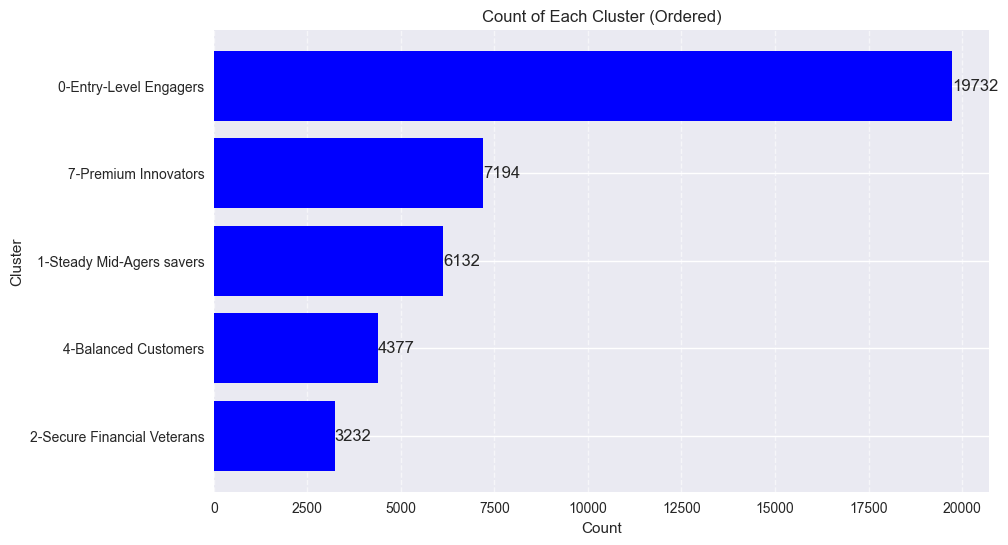

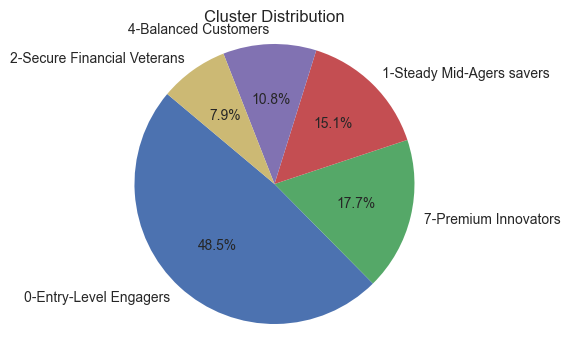

In [55]:

cluster_counts = top_customers['cluster'].value_counts()
# Sorting the cluster counts in descending order
cluster_counts_sorted = cluster_counts.sort_values(ascending=False)

# Dictionary mapping cluster numbers to descriptions
cluster_descriptions = {
    0: '0-Entry-Level Engagers',
    1: '1-Steady Mid-Agers savers',
    2: '2-Secure Financial Veterans',
    3: '3-Fresh Start Consumers',
    4: '4-Balanced Customers',
    5: '5-Young Potentials',
    6: '6-Aspirational Diversifiers',
    7: '7-Premium Innovators'
}

# Convert the index to a list
index_list = cluster_counts_sorted.index.tolist()

# Plotting the bar chart with modified yticks
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(cluster_counts_sorted)), cluster_counts_sorted.values, color='blue')
plt.xlabel('Count')
plt.ylabel('Cluster')
plt.title('Count of Each Cluster (Ordered)')
plt.yticks(range(len(cluster_counts_sorted)), [cluster_descriptions[idx] for idx in index_list])

# Adding labels on top of the bars
for bar, count in zip(bars, cluster_counts_sorted.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, count, 
             va='center', ha='left', fontsize=12)

plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(cluster_counts, labels=[cluster_descriptions[idx] for idx in cluster_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Our analysis reveals that the largest portion of our potential users falls into cluster 0, classified as Entry-level Engagers, closely followed by cluster 7, denoted as Premium Innovators, and cluster 1, termed Steady Mid-Agers (constituting 13.2% of the total). Additionally, there is significant interest observed in cluster 4, recognized as Balanced Customers (10.6%), and cluster 2, identified as Secure Veterans (6.8%).

As a final step, we must ensure the continued status of all our customers as EasyMoney's clientele by confirming their presence in the most recent data batch.

In [56]:
# Filter merged_all_three to include only rows with pk_partition equal to '2019-05-28'
last_partition = merged_all_three[merged_all_three['pk_partition'] == '2019-05-28']

# Identify unique pk_cid with the last partition
last_partition_pk_cid = last_partition['pk_cid'].unique()

# Add a new column 'current_customer' to top_customers based on whether pk_cid is in last_partition_pk_cid
top_customers['current_customer'] = top_customers['pk_cid'].isin(last_partition_pk_cid).astype(int)

# Display the updated DataFrame
display(top_customers[top_customers['current_customer']== 0].shape)
display(top_customers[top_customers['current_customer']== 0])

(600, 23)

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank,current_customer
13762,1075447.0,0.00,5.12,4.36,0.00,0.00,0.20,5.12,4.32,0.00,4.22,0.0,0.0,0.0,0.0,0.0,7,6664.0,165.714286,0.885268,146.701494,13763.0,0
15859,396977.0,4.82,5.12,0.00,0.00,2.18,0.00,0.30,5.12,0.00,0.00,0.0,0.0,0.0,0.0,0.0,7,15683.0,192.857143,0.729967,140.779262,15860.0,0
16233,1246726.0,0.12,3.42,0.00,0.00,0.00,3.30,3.30,3.42,0.00,4.02,0.0,0.0,0.0,0.0,0.0,0,15593.0,191.142857,0.731516,139.824113,16234.0,0
16828,1220739.0,0.00,5.12,4.22,4.22,0.00,0.00,4.22,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,15062.0,186.571429,0.740660,138.185947,16829.0,0
17843,1140374.0,2.74,4.22,0.00,0.00,0.00,0.00,1.48,4.22,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,25251.0,239.142857,0.565212,135.166423,17844.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40659,1021666.0,0.00,0.56,0.06,0.06,0.30,0.00,0.42,0.30,0.00,0.00,0.0,0.0,0.0,0.0,0.0,7,40191.0,134.285714,0.307955,41.354001,40660.0,0
40661,1408765.0,0.14,0.50,0.66,0.66,0.50,0.00,0.66,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,39790.0,130.285714,0.314860,41.021796,40662.0,0
40663,1217911.0,0.20,0.56,0.10,0.10,0.44,0.00,0.72,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,40086.0,130.285714,0.309763,40.357740,40664.0,0
40665,1167922.0,0.00,0.20,0.12,0.12,0.06,0.00,0.30,0.16,0.06,0.00,0.0,0.0,0.0,0.0,0.0,0,40420.0,112.571429,0.304012,34.223077,40666.0,0


we have 33 customers that are unsubscribed from the service but as their rank is more than 10,000 (the first 10,000 would be our test set and validation set) so I am going to keep them

In [57]:
top_customers.shape

(40667, 23)

### Train/Test/Validation

I want to split the train,test and validation dataset. Then, I am going to transform the trainset into a Surprise library friendly dataset and train the model on that. 

In [58]:
# Selecting the first 10,000 rows for test set
test_data = top_customers.iloc[0:10000]

# Selecting the next 5,000 rows for validation set
val_data = top_customers.iloc[10000:15000]

# Selecting the rest of the data for train set
train_data = top_customers.iloc[15000:]

# Check the shapes of each set
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (25667, 23)
Validation data shape: (5000, 23)
Test data shape: (10000, 23)


In [59]:
train_data.columns

Index(['pk_cid', 'em_account', 'debit_card', 'pension', 'payroll',
       'credit_card', 'long_term_deposit', 'payroll_account', 'emc_account',
       'securities', 'funds', 'short_term_deposit', 'loans', 'mortgage',
       'payroll_pension_unknown', 'em_account_p', 'cluster', 'engagement_Rank',
       'potential_roi', 'engagement_rate', 'engagement_ROI',
       'best_customer_to_target_Rank', 'current_customer'],
      dtype='object')

In [60]:
train_data.columns.get_loc('cluster')

16

In [61]:
train_data.set_index('pk_cid', inplace=True)

Now, Let's encode the product labels in train set:

In [62]:
popularity

,Product,Popularity,Normalized_Popularity,Weighted_ROI,Normalized_Weighted_ROI,Rank,Popularity_rate
0,em_account,283907.006536,1.000000,2.839070e+06,1.000000,1.0,100.000000
1,debit_card,38267.513072,0.134787,2.296051e+06,0.808733,2.0,94.285714
2,pension,14828.362745,0.052228,5.931345e+05,0.208919,3.0,88.571429
3,payroll,13997.866013,0.049303,5.599146e+05,0.197218,4.0,82.857143
4,credit_card,4521.718954,0.015925,2.713031e+05,0.095561,5.0,77.142857
5,long_term_deposit,6332.424837,0.022303,2.532970e+05,0.089218,6.0,71.428571
6,payroll_account,22785.290850,0.080254,2.278529e+05,0.080256,7.0,65.714286
7,emc_account,21474.349673,0.075637,2.147435e+05,0.075639,8.0,60.000000
8,securities,1577.133987,0.005553,6.308536e+04,0.022220,9.0,54.285714
9,funds,1287.526144,0.004533,5.150105e+04,0.018140,10.0,48.571429


In [63]:
columns_to_encode=popularity['Product']

In [64]:
train_data.head(20)

,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank,current_customer
pk_cid,,,,,,,,,,,,,,,,,,,,,,
1441539.0,0.90,5.20,4.50,4.50,0.00,0.0,4.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
1498903.0,0.40,4.90,4.90,4.90,0.00,0.0,4.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
1264861.0,0.50,4.40,4.90,4.90,0.00,0.0,4.9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
1500468.0,0.40,4.90,4.90,4.90,0.00,0.0,4.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
1461905.0,0.90,5.20,4.50,4.50,0.00,0.0,4.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1,10984.0,176.571429,0.810880,143.178267,15000.0,1
1445025.0,0.90,5.20,4.50,4.50,0.00,0.0,4.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
1448123.0,0.90,5.20,4.50,4.50,0.00,0.0,4.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1,10984.0,176.571429,0.810880,143.178267,15000.0,1
1071513.0,1.32,0.00,3.90,3.90,0.00,0.0,4.8,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2,22412.0,233.142857,0.614098,143.172494,15008.0,1
1017317.0,1.32,0.00,3.90,3.90,0.00,0.0,4.8,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,7,22412.0,233.142857,0.614098,143.172494,15008.0,1


In [65]:
train_data.shape

(25667, 22)

In [66]:
train_data.reset_index()

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank,current_customer
0,1441539.0,0.90,5.20,4.50,4.50,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
1,1498903.0,0.40,4.90,4.90,4.90,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
2,1264861.0,0.50,4.40,4.90,4.90,0.00,0.00,4.90,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
3,1500468.0,0.40,4.90,4.90,4.90,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.810880,143.178267,15000.0,1
4,1461905.0,0.90,5.20,4.50,4.50,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,10984.0,176.571429,0.810880,143.178267,15000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25662,1135386.0,0.30,1.42,0.12,0.12,0.06,0.00,0.92,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2,39906.0,130.285714,0.312863,40.761558,40663.0,1
25663,1217911.0,0.20,0.56,0.10,0.10,0.44,0.00,0.72,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,40086.0,130.285714,0.309763,40.357740,40664.0,0
25664,1054145.0,0.02,0.24,0.20,0.20,0.42,0.00,0.10,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2,40368.0,130.285714,0.304908,39.725092,40665.0,1
25665,1167922.0,0.00,0.20,0.12,0.12,0.06,0.00,0.30,0.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0,40420.0,112.571429,0.304012,34.223077,40666.0,0


In [67]:
test_data.head()

,pk_cid,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank,current_customer
0,1114648.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.92129,240.588424,1.0,1
1,1168268.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.92129,240.588424,1.0,1
2,1114871.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.92129,240.588424,1.0,1
3,1071765.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,7,4572.0,261.142857,0.92129,240.588424,1.0,1
4,1224642.0,6.12,0.0,0.0,0.0,0.0,0.0,0.0,6.12,6.12,6.12,0.0,0.0,0.0,0.0,0.0,0,4572.0,261.142857,0.92129,240.588424,1.0,1


In [71]:
user_item_ratio_matrix=train_data.iloc[:, :15]

user_item_ratio_matrix

,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p
pk_cid,,,,,,,,,,,,,,,
1441539.0,0.90,5.20,4.50,4.50,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1498903.0,0.40,4.90,4.90,4.90,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1264861.0,0.50,4.40,4.90,4.90,0.00,0.00,4.90,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1500468.0,0.40,4.90,4.90,4.90,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1461905.0,0.90,5.20,4.50,4.50,0.00,0.00,4.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135386.0,0.30,1.42,0.12,0.12,0.06,0.00,0.92,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1217911.0,0.20,0.56,0.10,0.10,0.44,0.00,0.72,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1054145.0,0.02,0.24,0.20,0.20,0.42,0.00,0.10,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Stack the user_item_ratio_matrix to get all values in single column
user_item_ratio_stacked = user_item_ratio_matrix.stack().to_frame()

# Create column for user id
user_item_ratio_stacked['pk_cid'] = [index[0] for index in user_item_ratio_stacked.index]

# Create column for service_opted
user_item_ratio_stacked['service_portfolio'] = [index[1] for index in user_item_ratio_stacked.index]

# Reset and drop the index
user_item_ratio_stacked.reset_index(drop=True, inplace=True)

# Print the dataframe
user_item_ratio_stacked

,0,pk_cid,service_portfolio
0,0.9,1441539.0,em_account
1,5.2,1441539.0,debit_card
2,4.5,1441539.0,pension
3,4.5,1441539.0,payroll
4,0.0,1441539.0,credit_card
...,...,...,...
385000,0.0,1133822.0,short_term_deposit
385001,0.0,1133822.0,loans
385002,0.0,1133822.0,mortgage
385003,0.0,1133822.0,payroll_pension_unknown


In [74]:
# Rename the column 0 to service_selection_ratio
user_item_ratio_stacked.rename(columns={0:"service_selection_ratio"}, inplace=True)

In [75]:
# Arange the column systematicaly for better view
user_item_ratio_stacked = user_item_ratio_stacked[['pk_cid','service_portfolio', 'service_selection_ratio']]
# Drop all the rows with 0 entries as it means the user has never opted for the service
user_item_ratio_stacked.drop(user_item_ratio_stacked[user_item_ratio_stacked['service_selection_ratio']==0].index, inplace=True)
# Reset the index
user_item_ratio_stacked.reset_index(drop=True, inplace=True)

In [76]:
user_item_ratio_stacked

,pk_cid,service_portfolio,service_selection_ratio
0,1441539.0,em_account,0.90
1,1441539.0,debit_card,5.20
2,1441539.0,pension,4.50
3,1441539.0,payroll,4.50
4,1441539.0,payroll_account,4.50
...,...,...,...
111582,1133822.0,payroll,0.02
111583,1133822.0,credit_card,0.06
111584,1133822.0,long_term_deposit,0.42
111585,1133822.0,payroll_account,0.44


In [77]:
# Get the column names from column number 0 to 14
columns_to_encode = train_data.columns[0:15]

In [78]:
columns_to_encode

Index(['em_account', 'debit_card', 'pension', 'payroll', 'credit_card',
       'long_term_deposit', 'payroll_account', 'emc_account', 'securities',
       'funds', 'short_term_deposit', 'loans', 'mortgage',
       'payroll_pension_unknown', 'em_account_p'],
      dtype='object')

In [79]:

# Define the DataFrame with the column names as index
column_map = pd.DataFrame(columns_to_encode, columns=['Column_Name'])

# Add a new column 'Encoded_Number' containing the encoded numbers
column_map['Encoded_Number'] = column_map.index

# Print the DataFrame
print(column_map)

                Column_Name  Encoded_Number
0                em_account               0
1                debit_card               1
2                   pension               2
3                   payroll               3
4               credit_card               4
5         long_term_deposit               5
6           payroll_account               6
7               emc_account               7
8                securities               8
9                     funds               9
10       short_term_deposit              10
11                    loans              11
12                 mortgage              12
13  payroll_pension_unknown              13
14             em_account_p              14


In [80]:
train_data.head()

,em_account,debit_card,pension,payroll,credit_card,long_term_deposit,payroll_account,emc_account,securities,funds,short_term_deposit,loans,mortgage,payroll_pension_unknown,em_account_p,cluster,engagement_Rank,potential_roi,engagement_rate,engagement_ROI,best_customer_to_target_Rank,current_customer
pk_cid,,,,,,,,,,,,,,,,,,,,,,
1441539.0,0.9,5.2,4.5,4.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.81088,143.178267,15000.0,1
1498903.0,0.4,4.9,4.9,4.9,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.81088,143.178267,15000.0,1
1264861.0,0.5,4.4,4.9,4.9,0.0,0.0,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.81088,143.178267,15000.0,1
1500468.0,0.4,4.9,4.9,4.9,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10984.0,176.571429,0.81088,143.178267,15000.0,1
1461905.0,0.9,5.2,4.5,4.5,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,10984.0,176.571429,0.81088,143.178267,15000.0,1


In [81]:
raw_target = column_map

In [82]:
raw_target

,Column_Name,Encoded_Number
0,em_account,0
1,debit_card,1
2,pension,2
3,payroll,3
4,credit_card,4
5,long_term_deposit,5
6,payroll_account,6
7,emc_account,7
8,securities,8
9,funds,9


In [83]:
# Create a dictionary mapping service portfolio names to encoded numbers
service_portfolio_map = dict(zip(raw_target['Column_Name'], raw_target['Encoded_Number']))
service_portfolio_map

{'em_account': 0,
 'debit_card': 1,
 'pension': 2,
 'payroll': 3,
 'credit_card': 4,
 'long_term_deposit': 5,
 'payroll_account': 6,
 'emc_account': 7,
 'securities': 8,
 'funds': 9,
 'short_term_deposit': 10,
 'loans': 11,
 'mortgage': 12,
 'payroll_pension_unknown': 13,
 'em_account_p': 14}

In [84]:
# Map the values to create the service code column
user_item_ratio_stacked['service_code'] = user_item_ratio_stacked['service_portfolio'].map(service_portfolio_map)

In [85]:
user_item_ratio_stacked

,pk_cid,service_portfolio,service_selection_ratio,service_code
0,1441539.0,em_account,0.90,0
1,1441539.0,debit_card,5.20,1
2,1441539.0,pension,4.50,2
3,1441539.0,payroll,4.50,3
4,1441539.0,payroll_account,4.50,6
...,...,...,...,...
111582,1133822.0,payroll,0.02,3
111583,1133822.0,credit_card,0.06,4
111584,1133822.0,long_term_deposit,0.42,5
111585,1133822.0,payroll_account,0.44,6


In [86]:
user_item_ratio_stacked.columns

Index(['pk_cid', 'service_portfolio', 'service_selection_ratio',
       'service_code'],
      dtype='object')

In [87]:
user_item_ratio_stacked

,pk_cid,service_portfolio,service_selection_ratio,service_code
0,1441539.0,em_account,0.90,0
1,1441539.0,debit_card,5.20,1
2,1441539.0,pension,4.50,2
3,1441539.0,payroll,4.50,3
4,1441539.0,payroll_account,4.50,6
...,...,...,...,...
111582,1133822.0,payroll,0.02,3
111583,1133822.0,credit_card,0.06,4
111584,1133822.0,long_term_deposit,0.42,5
111585,1133822.0,payroll_account,0.44,6


In [88]:
# Merge user_item_ratio_stacked with cid_cluster_map on pk_cid
user_item_ratio_stacked = user_item_ratio_stacked.merge(cid_cluster_map, on='pk_cid', how='left')

# Drop unnecessary columns
#user_item_ratio_stacked.drop(columns=['pk_partition'], inplace=True)

# Print the updated dataframe
user_item_ratio_stacked.head(50)

,pk_cid,service_portfolio,service_selection_ratio,service_code,cluster
0,1441539.0,em_account,0.90,0,0
1,1441539.0,debit_card,5.20,1,0
2,1441539.0,pension,4.50,2,0
3,1441539.0,payroll,4.50,3,0
4,1441539.0,payroll_account,4.50,6,0
5,1498903.0,em_account,0.40,0,0
6,1498903.0,debit_card,4.90,1,0
7,1498903.0,pension,4.90,2,0
8,1498903.0,payroll,4.90,3,0
9,1498903.0,payroll_account,4.50,6,0


Data preparation final check for making sure that the data is prepared and Surprise friendly

In [89]:
# Group by pk_cid and normalize the service_selection_ratio column
user_item_ratio_stacked['service_selection_ratio'] = user_item_ratio_stacked.groupby('pk_cid')['service_selection_ratio'].transform(lambda x: x / x.sum())

# Verify the sum of values for each unique pk_cid
sums_per_pk_cid = user_item_ratio_stacked.groupby('pk_cid')['service_selection_ratio'].sum()
sums_per_pk_cid.sum

<bound method Series.sum of pk_cid
21719.0      1.0
35849.0      1.0
36148.0      1.0
37299.0      1.0
39997.0      1.0
            ... 
1551597.0    1.0
1551712.0    1.0
1551832.0    1.0
1552055.0    1.0
1552364.0    1.0
Name: service_selection_ratio, Length: 25667, dtype: float64>

In [90]:
cid_cluster_map[cid_cluster_map['pk_cid']== 1358435.0]

,pk_cid,cluster
4489060,1358435,4


Now, we have our data preprocessed and ready to train the model. I am going to use SVD model from Surprise library using matrix factorization to find the patterns , nearest neighbour model for item-based and user-based similarity collaborative filtering. Let's save the files and move to the third section which is the next ipynd file for modelling.

In [91]:
# files to save:
# Save user_item_ratio_stacked
user_item_ratio_stacked.to_csv('user_item_ratio_stacked.csv',index=False)

# Save service_portfolio_map
raw_target.to_csv('service_portfolio_map.csv',index=False)

# Save train_data
train_data.to_csv('train_data.csv')

# Save test_data
test_data.to_csv('test_data.csv',index=False)

# Save val_data
val_data.to_csv('val_data.csv',index=False)

# Save interactions
interactions.to_csv('interactions.csv')

# Save cid_cluster_map
cid_cluster_map.to_csv('cid_cluster_map.csv',index=False)

# Save top_customers
top_customers.to_csv('top_customers.csv',index=False)
